# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country. 

If we add all these factors up, we get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [207]:
import pandas as pd
import numpy as np


In [156]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# about columns

different columns are country,region,happiness rank, GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption,Dystopia Residual ,, these are all input variables where as the target variable is Happiness Score  

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [160]:
df["Region"] = le.fit_transform(df["Region"].astype(str))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [161]:
y=df.iloc[:,3]

In [162]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [163]:
x=df.iloc[:,4:]

In [164]:
x.shape

(158, 8)

In [165]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Here we have splitted the data in to x and y . We have not taken Country , Region , Happiness Rank in the input variable as these columns are not going to affect muct to the target variable.

In [166]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Here we can see that not much difference is there between mean values and median values and between 75% and max values. 

In [167]:
df.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Here we can see that little bit skewness is present in the variables. So we need to remove the skewness .

In [168]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Here we can see that nop null values are present in the variables .

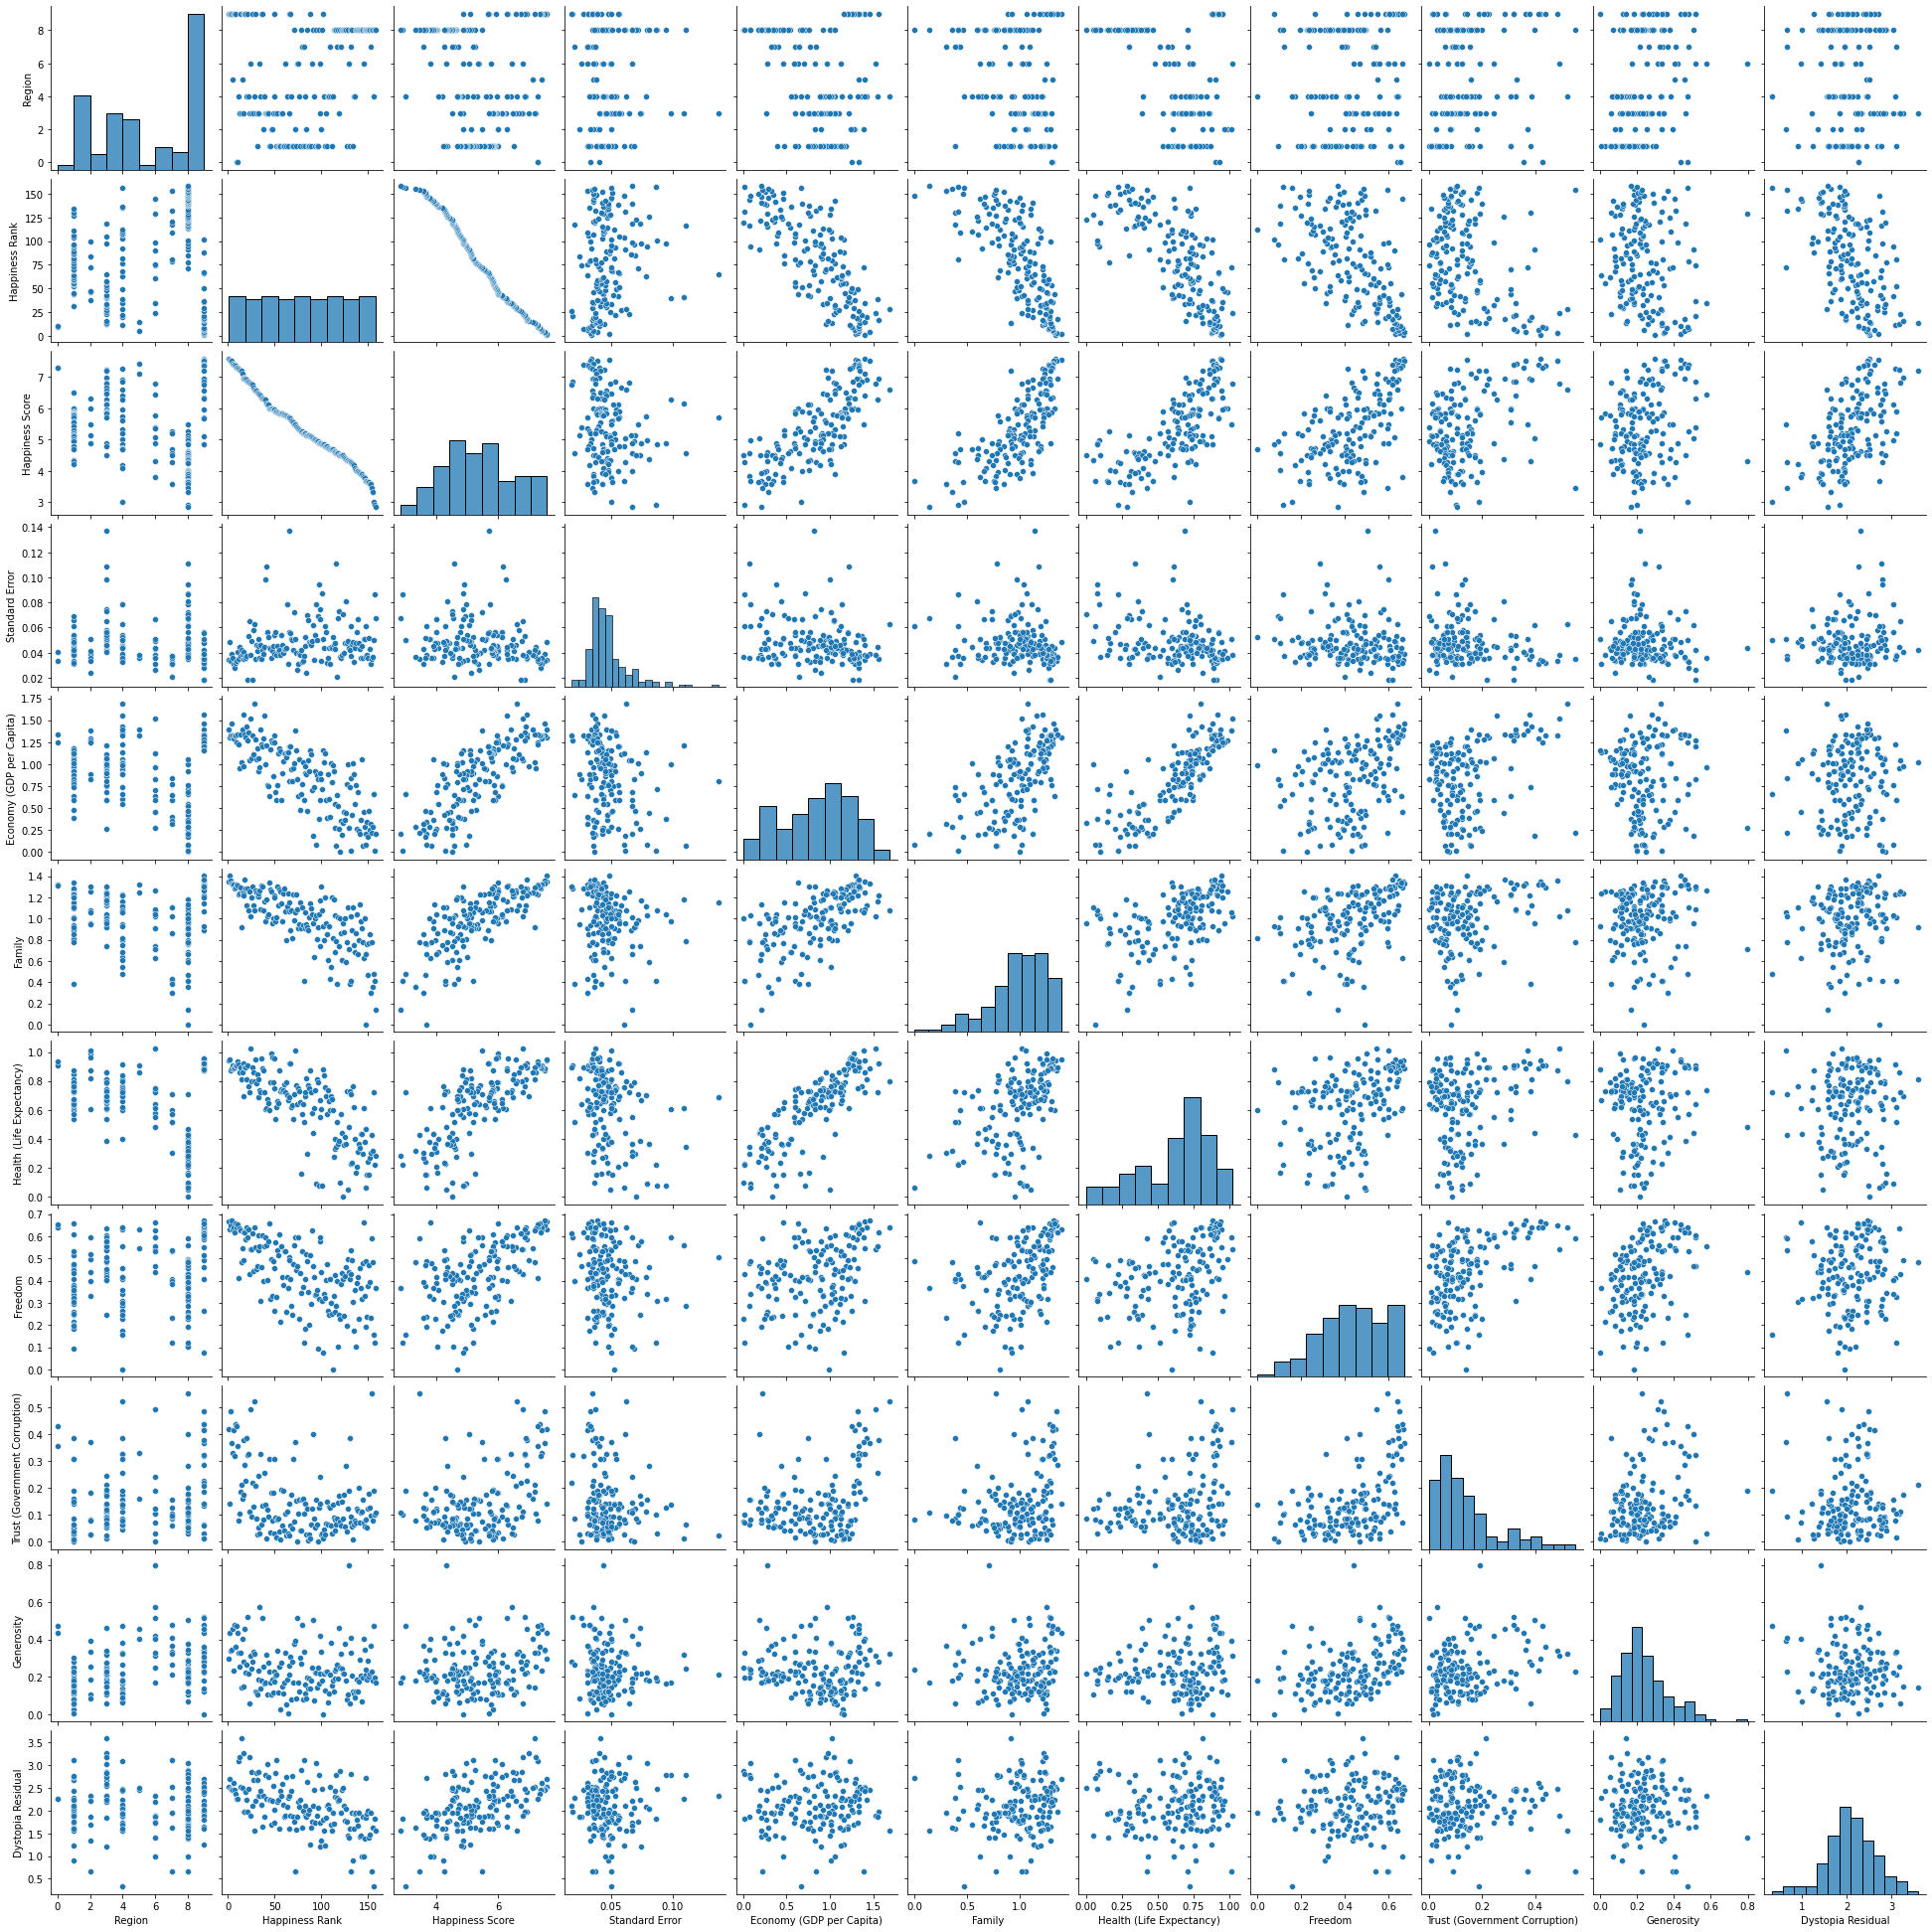

In [169]:
sns.pairplot(df)

Here we can see the different bivariate analysis through scatter plot . 
We can also see that different variables like Standard Error , Economy (GDP per Capita) , Family , Health (Life Expectancy) , Freedom , Trust (Government Corruption) , Generosity , Dystopia Residual are more or less possitively related with the target variable happyness score.

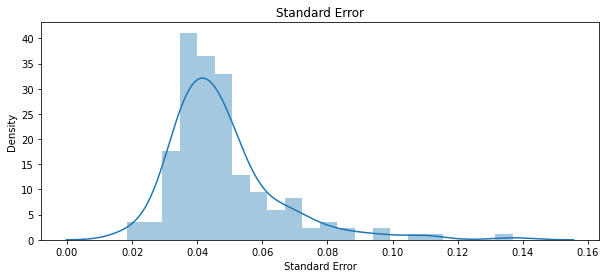

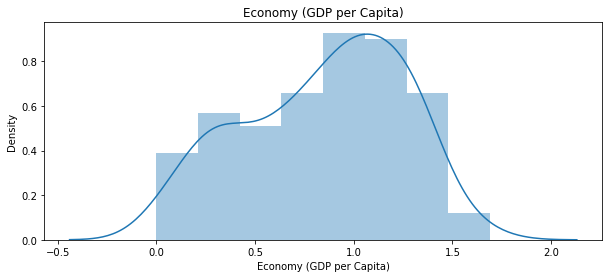

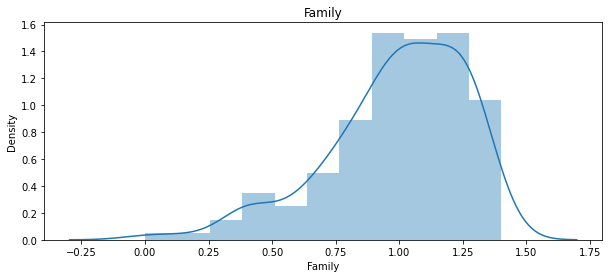

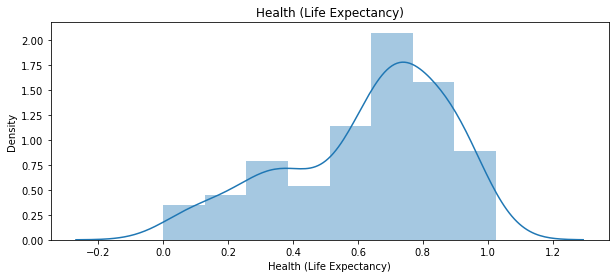

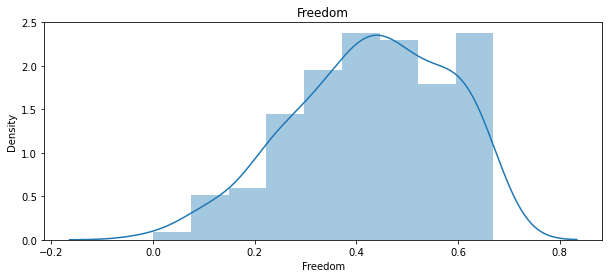

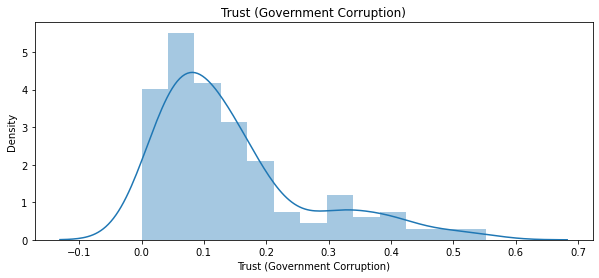

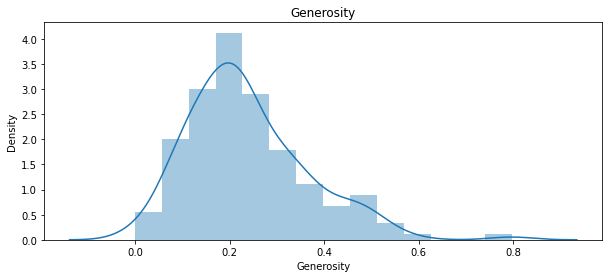

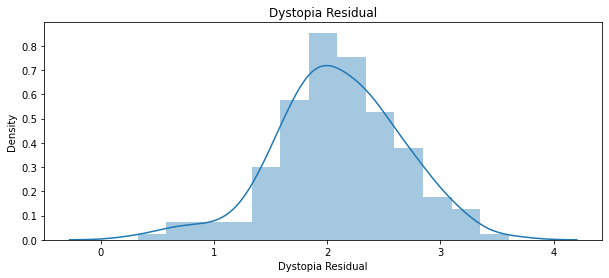

In [170]:
for col in x.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.distplot(x[col])
    plt.title(col)

Here we can see the different univariate analysis of different unput variables through distplot. Here we can see that skewness is present in different variables so we nwwd to remove the skewness .

In [201]:
df.corr()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


<AxesSubplot:>

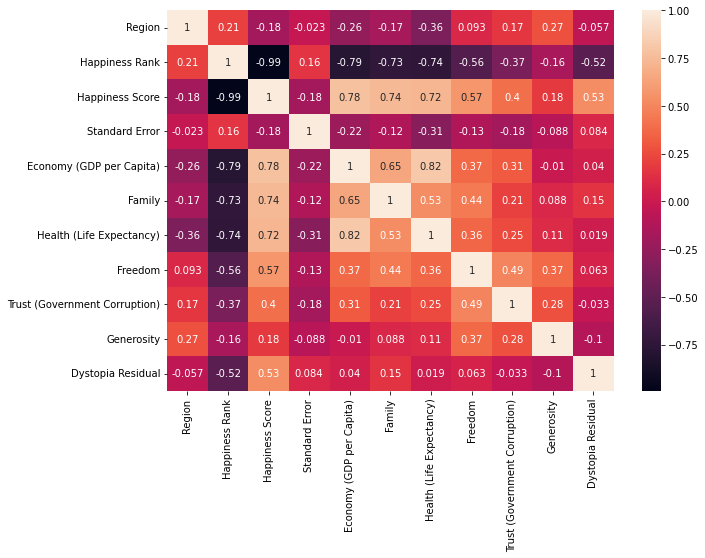

In [205]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True ,linecolor = "black")

Here we can see different correlation through heat map . Here it is found that Happiness Rank is highly negetively correlated with the target variable because Happiness Score and Happiness Rank are inversely proportional to each other . A good correlation is present among the rest variables.

In [171]:
from sklearn.preprocessing import power_transform

In [172]:
xt=power_transform(x, method="yeo-johnson")
xt


array([[-0.9722262 ,  1.44606101,  1.66920633, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 0.30934969,  1.17332111,  2.01213244, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.06201662,  1.23983557,  1.73958573, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 0.39913742, -0.5134688 , -1.69066357, ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 1.92690194, -1.89495386, -1.79680304, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.31032295, -1.52122584, -2.16039658, ..., -0.06732623,
        -0.49041465, -0.97664547]])

Here we have removed the skewness of different input variables .

In [173]:
xt=pd.DataFrame(xt)
xt.columns = x.columns
xt

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


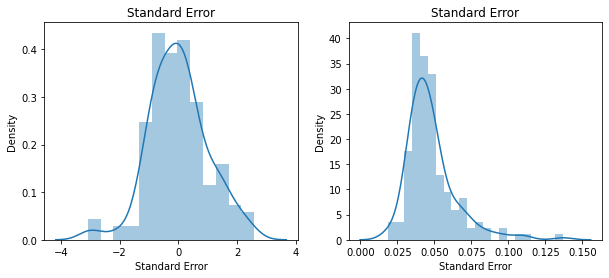

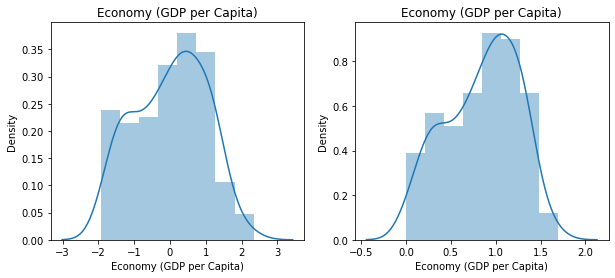

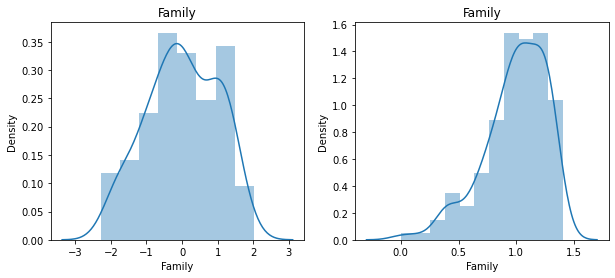

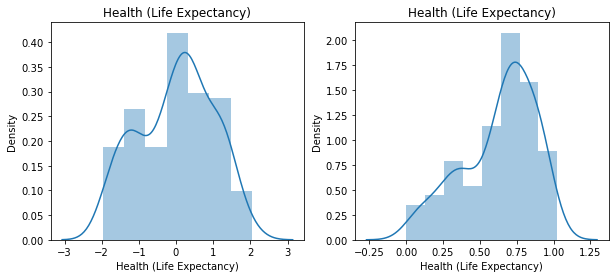

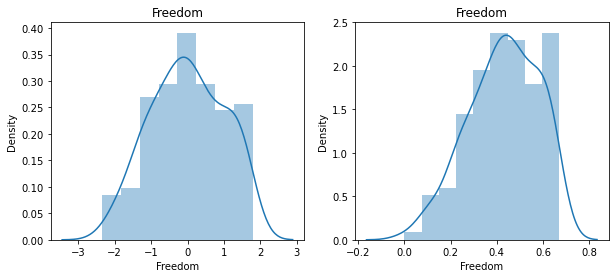

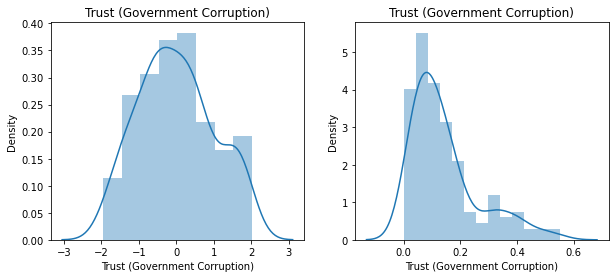

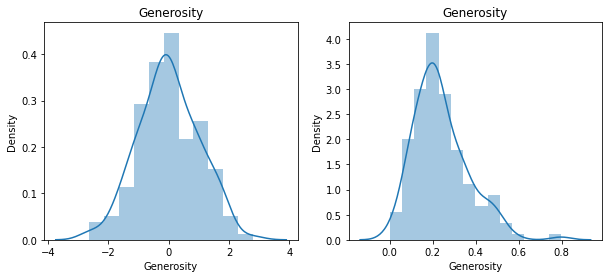

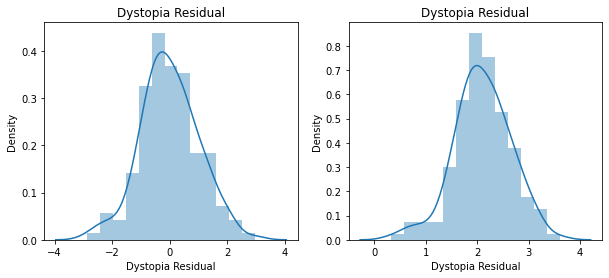

In [174]:
for col in xt.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(xt[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x[col])
    plt.title(col)

Here we have plotted graphs after doing the univariate analysis of input variables and we can clearly compare the both graphs after removing skewness and before removing skewness. Here we can see that a lot of changes are there after removing the skewness of input variables.

In [175]:
xt.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

 After removing the skewness we can see that not much skewness is present in the variables .

# model selection

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
lg=LinearRegression()

As tha target vcariable is contenous type so we are using Linear Regression model here

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train,x_test,y_train,y_test=train_test_split(xt,y,test_size=0.2,random_state=42)

In [180]:
x_train.shape

(126, 8)

In [181]:
x_test.shape

(32, 8)

In [182]:
lg.fit(x_train,y_train)

LinearRegression()

In [183]:
lg.score(x_train,y_train)

0.992620641809861

Here we can see that model is  performing so well

In [184]:
pred=lg.predict(x_test)

In [185]:
from sklearn.metrics import r2_score

In [186]:
print(r2_score(y_test,pred))

0.9895030500636045


Here also we can see that model is performing so well

In [187]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,xt,y,cv=3)
score

array([0.87281327, 0.90638107, 0.80009233])

In [188]:
print(score.mean())

0.8597622227688048


Here we can see that not much deifference in between r2 score and cross val score . still we should try another model here if any model performs better.

In [189]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [190]:
dtr = DecisionTreeRegressor()
svr= SVR()
knr=KNeighborsRegressor()

In [191]:
l=[dtr,svr,knr]

In [200]:
for i in l:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i.score(x_train,y_train))

1.0
0.9854700629571479
0.9249027766749895


Here we can see that Decision Tree Regressior model is giving the best result . So we should take this model for prediction.

In [206]:
a= np.array(y_test)
dtrpred=np.array(dtr.predict(x_test))
df_comp=pd.DataFrame({"original":a,"predicted":dtrpred})
df_comp

,original,predicted
0,4.307,5.399
1,5.987,6.798
2,4.194,4.839
3,2.905,3.995
4,5.057,4.436
5,6.574,6.477
6,4.898,4.610
7,4.876,5.399
8,4.949,4.788
9,3.931,3.575


Here we can compare the original result with p[redicted result by using Decision Tree Regressior model.